In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Data-Collisions-2.csv")

/Users/AZ/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df1 = pd.read_csv("Data-Collisions-2.csv")

In [4]:
df.drop(df1.columns.difference(['X','Y', 'OBJECTID', 'WEATHER','ROADCOND','LIGHTCOND','INCDTTM']), 1, inplace=True)

In [5]:
df1.drop(df1.columns.difference(['OBJECTID','INCDTTM']), 1, inplace=True)

In [6]:
df1 = df1.dropna()
df1

,OBJECTID,INCDTTM
0,1,3/27/2013 2:54:00 PM
1,2,12/20/2006 6:55:00 PM
2,3,11/18/2004 10:20:00 AM
3,4,3/29/2013 9:26:00 AM
4,5,1/28/2004 8:04:00 AM
...,...,...
194668,219543,11/12/2018 8:12:00 AM
194669,219544,12/18/2018 9:14:00 AM
194670,219545,1/19/2019 9:25:00 AM
194671,219546,1/15/2019 4:48:00 PM


In [7]:
df1['freq'] = 1

In [8]:
df1['INCDTTM'] = pd.to_datetime(df1['INCDTTM'], errors='coerce')
df1 = df1.dropna(subset=['INCDTTM'])

df1.head(10)

,OBJECTID,INCDTTM,freq
0,1,2013-03-27 14:54:00,1
1,2,2006-12-20 18:55:00,1
2,3,2004-11-18 10:20:00,1
3,4,2013-03-29 09:26:00,1
4,5,2004-01-28 08:04:00,1
5,6,2019-04-20 17:42:00,1
6,7,2008-12-09 00:00:00,1
7,9,2020-04-15 17:47:00,1
8,10,2006-06-15 13:00:00,1
9,12,2006-03-20 15:49:00,1


In [9]:
df1.INCDTTM = pd.to_datetime(df1.INCDTTM, format='%m/%d/%Y %I:%M:%S %p')
df1['year'] = df1.INCDTTM.apply(lambda x: x.year)


In [10]:
df1.drop(df1.columns[[1,0]], axis=1, inplace=True)
df1

,freq,year
0,1,2013
1,1,2006
2,1,2004
3,1,2013
4,1,2004
...,...,...
194668,1,2018
194669,1,2018
194670,1,2019
194671,1,2019


In [11]:
cols = df1.columns.tolist()

In [12]:
df1 = df1.groupby(cols, as_index=False)['freq'].sum()
df1

,year,freq
0,2004,11865
1,2005,15115
2,2006,15188
3,2007,14456
4,2008,13660
5,2009,11734
6,2010,10808
7,2011,10919
8,2012,10907
9,2013,10577


In [13]:
df1.set_index('year', inplace=True)

In [16]:
df1 = df1.transpose()
df1.head()

,freq
year,
2004,11865
2005,15115
2006,15188
2007,14456
2008,13660


In [30]:
df1

,freq
year,
2004,11865
2005,15115
2006,15188
2007,14456
2008,13660
2009,11734
2010,10808
2011,10919
2012,10907


In [33]:
df1 = df1.drop([2020])

In [16]:
df1.sort_values(by='freq', ascending=False, inplace=True)

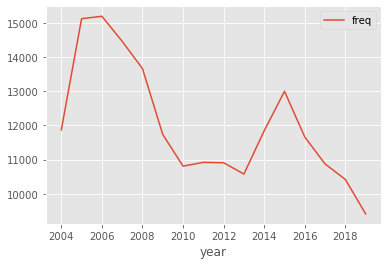

In [34]:
df1.plot()

In [19]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.3


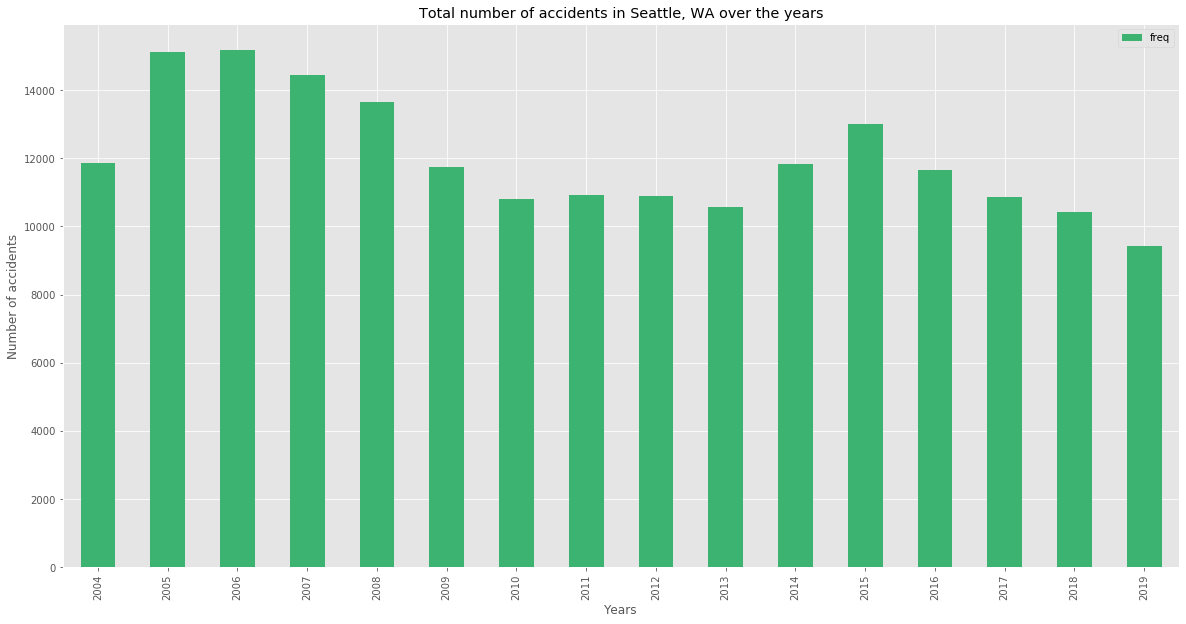

In [43]:
df1.index = df1.index.map(int) # let's change the index values of df_top5 to type integer for plotting
df1.plot(kind='bar', 
             stacked=False,
             figsize=(20, 10), # pass a tuple (x, y) size
             color=['mediumseagreen'])

plt.title('Total number of accidents in Seattle, WA over the years')
plt.ylabel('Number of accidents')
plt.xlabel('Years')

plt.show()

In [109]:
df = pd.read_csv("zipinfacc.csv")

In [110]:
df['freq'] = 1

In [111]:
df1.columns = ['lon','lat', 'OBJECTID','INCDTTM','WEATHER','ROADCOND','LIGHTCOND']
df1

,lon,lat,OBJECTID,INCDTTM,WEATHER,ROADCOND,LIGHTCOND
0,-122.323148,47.703140,1,3/27/2013 2:54:00 PM,Overcast,Wet,Daylight
1,-122.347294,47.647172,2,12/20/2006 6:55:00 PM,Raining,Wet,Dark - Street Lights On
2,-122.334540,47.607871,3,11/18/2004 10:20:00 AM,Overcast,Dry,Daylight
3,-122.334803,47.604803,4,3/29/2013 9:26:00 AM,Clear,Dry,Daylight
4,-122.306426,47.545739,5,1/28/2004 8:04:00 AM,Raining,Wet,Daylight
...,...,...,...,...,...,...,...
194668,-122.290826,47.565408,219543,11/12/2018 8:12:00 AM,Clear,Dry,Daylight
194669,-122.344526,47.690924,219544,12/18/2018 9:14:00 AM,Raining,Wet,Daylight
194670,-122.306689,47.683047,219545,1/19/2019 9:25:00 AM,Clear,Dry,Daylight
194671,-122.355317,47.678734,219546,1/15/2019 4:48:00 PM,Clear,Dry,Dusk


In [112]:
df_merged = df.merge(df1, how='outer', left_index=True, right_index=True)
df_merged

,lat_x,lon_x,zipcode,freq,lon_y,lat_y,OBJECTID,INCDTTM,WEATHER,ROADCOND,LIGHTCOND
0,47.703140,-122.323148,98125.0,1.0,-122.323148,47.703140,1.0,3/27/2013 2:54:00 PM,Overcast,Wet,Daylight
1,47.647172,-122.347294,98102.0,1.0,-122.347294,47.647172,2.0,12/20/2006 6:55:00 PM,Raining,Wet,Dark - Street Lights On
2,47.607871,-122.334540,98101.0,1.0,-122.334540,47.607871,3.0,11/18/2004 10:20:00 AM,Overcast,Dry,Daylight
3,47.604803,-122.334803,98104.0,1.0,-122.334803,47.604803,4.0,3/29/2013 9:26:00 AM,Clear,Dry,Daylight
4,47.545739,-122.306426,98108.0,1.0,-122.306426,47.545739,5.0,1/28/2004 8:04:00 AM,Raining,Wet,Daylight
...,...,...,...,...,...,...,...,...,...,...,...
194668,NaN,NaN,NaN,NaN,-122.290826,47.565408,219543.0,11/12/2018 8:12:00 AM,Clear,Dry,Daylight
194669,NaN,NaN,NaN,NaN,-122.344526,47.690924,219544.0,12/18/2018 9:14:00 AM,Raining,Wet,Daylight
194670,NaN,NaN,NaN,NaN,-122.306689,47.683047,219545.0,1/19/2019 9:25:00 AM,Clear,Dry,Daylight
194671,NaN,NaN,NaN,NaN,-122.355317,47.678734,219546.0,1/15/2019 4:48:00 PM,Clear,Dry,Dusk


In [113]:
df_merged.drop(df_merged.columns[[0,1,4,5]], axis=1, inplace=True)
df_merged

,zipcode,freq,OBJECTID,INCDTTM,WEATHER,ROADCOND,LIGHTCOND
0,98125.0,1.0,1.0,3/27/2013 2:54:00 PM,Overcast,Wet,Daylight
1,98102.0,1.0,2.0,12/20/2006 6:55:00 PM,Raining,Wet,Dark - Street Lights On
2,98101.0,1.0,3.0,11/18/2004 10:20:00 AM,Overcast,Dry,Daylight
3,98104.0,1.0,4.0,3/29/2013 9:26:00 AM,Clear,Dry,Daylight
4,98108.0,1.0,5.0,1/28/2004 8:04:00 AM,Raining,Wet,Daylight
...,...,...,...,...,...,...,...
194668,NaN,NaN,219543.0,11/12/2018 8:12:00 AM,Clear,Dry,Daylight
194669,NaN,NaN,219544.0,12/18/2018 9:14:00 AM,Raining,Wet,Daylight
194670,NaN,NaN,219545.0,1/19/2019 9:25:00 AM,Clear,Dry,Daylight
194671,NaN,NaN,219546.0,1/15/2019 4:48:00 PM,Clear,Dry,Dusk


In [114]:
df_merged20000 = df_merged.copy()

In [115]:
df_merged20000['INCDTTM'] = pd.to_datetime(df_merged20000['INCDTTM'], errors='coerce')
df_merged20000 = df_merged20000.dropna(subset=['INCDTTM'])

df_merged20000.head(10)

,zipcode,freq,OBJECTID,INCDTTM,WEATHER,ROADCOND,LIGHTCOND
0,98125.0,1.0,1.0,2013-03-27 14:54:00,Overcast,Wet,Daylight
1,98102.0,1.0,2.0,2006-12-20 18:55:00,Raining,Wet,Dark - Street Lights On
2,98101.0,1.0,3.0,2004-11-18 10:20:00,Overcast,Dry,Daylight
3,98104.0,1.0,4.0,2013-03-29 09:26:00,Clear,Dry,Daylight
4,98108.0,1.0,5.0,2004-01-28 08:04:00,Raining,Wet,Daylight
5,98117.0,1.0,6.0,2019-04-20 17:42:00,Clear,Dry,Daylight
6,98101.0,1.0,7.0,2008-12-09 00:00:00,Raining,Wet,Daylight
7,98101.0,1.0,9.0,2020-04-15 17:47:00,Clear,Dry,Daylight
8,98101.0,1.0,10.0,2006-06-15 13:00:00,Clear,Dry,Daylight
9,98136.0,1.0,12.0,2006-03-20 15:49:00,Clear,Dry,Daylight


In [116]:
df_merged20000.INCDTTM = pd.to_datetime(df_merged20000.INCDTTM, format='%m/%d/%Y %I:%M:%S %p')
df_merged20000['year'] = df_merged20000.INCDTTM.apply(lambda x: x.year)
df_merged20000['month'] = df_merged20000.INCDTTM.apply(lambda x: x.month)
df_merged20000['day'] = df_merged20000.INCDTTM.apply(lambda x: x.day)

In [117]:
df_merged20000 = df_merged20000.dropna()
df_merged20000

,zipcode,freq,OBJECTID,INCDTTM,WEATHER,ROADCOND,LIGHTCOND,year,month,day
0,98125.0,1.0,1.0,2013-03-27 14:54:00,Overcast,Wet,Daylight,2013,3,27
1,98102.0,1.0,2.0,2006-12-20 18:55:00,Raining,Wet,Dark - Street Lights On,2006,12,20
2,98101.0,1.0,3.0,2004-11-18 10:20:00,Overcast,Dry,Daylight,2004,11,18
3,98104.0,1.0,4.0,2013-03-29 09:26:00,Clear,Dry,Daylight,2013,3,29
4,98108.0,1.0,5.0,2004-01-28 08:04:00,Raining,Wet,Daylight,2004,1,28
...,...,...,...,...,...,...,...,...,...,...
184162,98144.0,1.0,207097.0,2018-06-14 12:27:00,Clear,Dry,Daylight,2018,6,14
184163,98103.0,1.0,207099.0,2018-07-18 20:16:00,Clear,Dry,Dark - Street Lights On,2018,7,18
184164,98115.0,1.0,207100.0,2018-08-03 18:09:00,Clear,Dry,Daylight,2018,8,3
184165,98103.0,1.0,207101.0,2018-07-21 08:40:00,Clear,Dry,Other,2018,7,21


In [118]:
df_merged20000.drop(df_merged20000.columns[[2,3]], axis=1, inplace=True)
df_merged20000

,zipcode,freq,WEATHER,ROADCOND,LIGHTCOND,year,month,day
0,98125.0,1.0,Overcast,Wet,Daylight,2013,3,27
1,98102.0,1.0,Raining,Wet,Dark - Street Lights On,2006,12,20
2,98101.0,1.0,Overcast,Dry,Daylight,2004,11,18
3,98104.0,1.0,Clear,Dry,Daylight,2013,3,29
4,98108.0,1.0,Raining,Wet,Daylight,2004,1,28
...,...,...,...,...,...,...,...,...
184162,98144.0,1.0,Clear,Dry,Daylight,2018,6,14
184163,98103.0,1.0,Clear,Dry,Dark - Street Lights On,2018,7,18
184164,98115.0,1.0,Clear,Dry,Daylight,2018,8,3
184165,98103.0,1.0,Clear,Dry,Other,2018,7,21


In [18]:
cols = df_merged20000.columns.tolist()

In [19]:
df_merged20000 = df_merged20000.groupby(cols, as_index=False)['freq'].sum()
df_merged20000.sort_values(by='freq', ascending=False, inplace=True)
df_merged20000

,zipcode,WEATHER,ROADCOND,LIGHTCOND,year,month,day,freq
3706,98101.0,Clear,Dry,Daylight,2011,6,3,9.0
10067,98101.0,Raining,Wet,Daylight,2006,11,2,9.0
4630,98101.0,Clear,Dry,Daylight,2015,7,30,9.0
79587,98117.0,Clear,Dry,Daylight,2015,6,10,9.0
29402,98104.0,Clear,Dry,Daylight,2013,8,5,8.0
...,...,...,...,...,...,...,...,...
53551,98108.0,Clear,Dry,Daylight,2010,8,10,1.0
53550,98108.0,Clear,Dry,Daylight,2010,8,8,1.0
53549,98108.0,Clear,Dry,Daylight,2010,7,30,1.0
53548,98108.0,Clear,Dry,Daylight,2010,7,29,1.0


In [20]:
df_merged20000.drop(df_merged20000.columns[[4,5,6]], axis=1, inplace=True)
df_merged20000

,zipcode,WEATHER,ROADCOND,LIGHTCOND,freq
3706,98101.0,Clear,Dry,Daylight,9.0
10067,98101.0,Raining,Wet,Daylight,9.0
4630,98101.0,Clear,Dry,Daylight,9.0
79587,98117.0,Clear,Dry,Daylight,9.0
29402,98104.0,Clear,Dry,Daylight,8.0
...,...,...,...,...,...
53551,98108.0,Clear,Dry,Daylight,1.0
53550,98108.0,Clear,Dry,Daylight,1.0
53549,98108.0,Clear,Dry,Daylight,1.0
53548,98108.0,Clear,Dry,Daylight,1.0


In [21]:
df_merged20000 = pd.get_dummies(df_merged20000, columns=["WEATHER",'ROADCOND','LIGHTCOND','zipcode'])

In [22]:
df_merged20000=df_merged20000.apply(pd.to_numeric, errors='ignore')

In [23]:
df_mergedfinal=df_merged20000.copy()

In [24]:
df_features=df_mergedfinal.drop(df_mergedfinal[['freq']], axis=1)
df_features

,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Other,WEATHER_Overcast,WEATHER_Partly Cloudy,WEATHER_Raining,WEATHER_Severe Crosswind,WEATHER_Sleet/Hail/Freezing Rain,WEATHER_Snowing,...,zipcode_98126.0,zipcode_98133.0,zipcode_98134.0,zipcode_98136.0,zipcode_98144.0,zipcode_98146.0,zipcode_98168.0,zipcode_98177.0,zipcode_98178.0,zipcode_98199.0
3706,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10067,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4630,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79587,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29402,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53551,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53550,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53549,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53548,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
df_mergedfinal.reset_index(drop=True, inplace=True)
df_mergedfinal.head(3)

,freq,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Other,WEATHER_Overcast,WEATHER_Partly Cloudy,WEATHER_Raining,WEATHER_Severe Crosswind,WEATHER_Sleet/Hail/Freezing Rain,...,zipcode_98126.0,zipcode_98133.0,zipcode_98134.0,zipcode_98136.0,zipcode_98144.0,zipcode_98146.0,zipcode_98168.0,zipcode_98177.0,zipcode_98178.0,zipcode_98199.0
0,9.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
X = np.asarray(df_features)
X.shape

(142341, 57)

In [44]:
df_mergedfinal['freq'] = df_mergedfinal['freq'].astype('int')
y = np.asarray(df_mergedfinal['freq'])
y.shape

(142341,)

In [25]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn import svm

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(0,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

NameError: name 'X_train' is not defined

In [27]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import xgboost as xgb

In [28]:
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression

In [92]:
Xg_train, Xg_valid = train_test_split(X, test_size=0.1, random_state=10)
Yg_train, Yg_valid = train_test_split(y, test_size=0.1, random_state=10)
features1 = list(X.columns.values)
features2 = list(y.columns.values)

In [93]:
dtrain = xgb.DMatrix(Xg_train[features1], Yg_train[features2])
dvalid = xgb.DMatrix(Xg_valid[features1], Yg_valid[features2])

In [94]:
def rmspe(y, yhat):
    return np.sqrt(np.mean((yhat / y-1) ** 2))

In [95]:
def rmspe_xg(yhat, y):
    y = np.expm1(y.get_label())
    y1 = np.expm1(yhat)
    return "rmspe", rmspe(y, yhat)

In [96]:
params = {"objective": "reg:linear",
          "booster" : "gbtree",
          "eta": 0.3,
          "max_depth": 10,
          "subsample": 0.9,
          "colsample_bytree": 0.7,
          "silent": 1,
          "seed": 1301
          }
num_boost_round = 15
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]

In [97]:
gbm = xgb.train(params, dtrain, num_boost_round, evals = watchlist,
  early_stopping_rounds = 5, feval = rmspe_xg, verbose_eval = True)

[18:06:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[18:06:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:0.76321	eval-rmse:0.74035	train-rmspe:0.65275	eval-rmspe:0.64856
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 5 rounds.
[1]	train-rmse:0.66283	eval-rmse:0.64189	train-rmspe:0.58561	eval-rmspe:0.58040
[2]	train-rmse:0.60786	eval-rmse:0.58850	train-rmspe:0.54030	eval-rmspe:0.53427
[3]	train-rmse:0.57513	eval-rmse:0.55828	train-rmspe:

In [101]:
print("Validating")
yhat = gbm.predict(xgb.DMatrix(Xg_valid[features1]))
error = rmspe(Yg_valid.freq.values, np.expm1(yhat))

Validating


In [102]:
test_copy = pd.read_csv("Data-Collisions-2.csv")
test_copy.head()

/Users/AZ/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [29]:
len(df_mergedfinal.columns)

58

In [68]:
from sklearn.metrics import accuracy_score
import pickle

In [30]:
X = df_mergedfinal.iloc[:, 1:58]
y = df_mergedfinal.iloc[:, 0:1]

In [62]:
headers = list(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

print(X_train.shape, X_test.shape)
print()
print('Number of rows in Train dataset: {train_df.shape[0]}')
print(y_train['freq'].value_counts())
print()
print('Number of rows in Test dataset: {test_df.shape[0]}')
print(y_test['freq'].value_counts())

(113872, 57) (28469, 57)

Number of rows in Train dataset: {train_df.shape[0]}
1.0    94768
2.0    14250
3.0     3466
4.0      980
5.0      292
6.0       83
7.0       19
8.0       11
9.0        3
Name: freq, dtype: int64

Number of rows in Test dataset: {test_df.shape[0]}
1.0    23693
2.0     3563
3.0      867
4.0      245
5.0       73
6.0       20
7.0        5
8.0        2
9.0        1
Name: freq, dtype: int64


In [60]:
y.reset_index(drop=True, inplace=True)
y.head(3)

,freq
0,9.0
1,9.0
2,9.0


In [61]:
X.reset_index(drop=True, inplace=True)
X.head(3)

,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Other,WEATHER_Overcast,WEATHER_Partly Cloudy,WEATHER_Raining,WEATHER_Severe Crosswind,WEATHER_Sleet/Hail/Freezing Rain,WEATHER_Snowing,...,zipcode_98126.0,zipcode_98133.0,zipcode_98134.0,zipcode_98136.0,zipcode_98144.0,zipcode_98146.0,zipcode_98168.0,zipcode_98177.0,zipcode_98178.0,zipcode_98199.0
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
%%time

import xgboost as xgb
param = {'max_depth':10, 
         'subsample':1,
         'min_child_weight':0.5,
         'eta':0.3, 
         'num_round':1000, 
         'seed':1,
         'silent':0,
         'eval_metric':'rmse'}

progress = dict()
xgbtrain = xgb.DMatrix(df_mergedfinal.iloc[:, 1:58].values, df_mergedfinal.iloc[:, 0:1].values)
watchlist  = [(xgbtrain,'train-rmse')]

bst = xgb.train(param, xgbtrain)
preds = bst.predict(xgb.DMatrix(df_mergedfinal.iloc[:, 1:58].values, df_mergedfinal.iloc[:, 0:1].values))
from sklearn.metrics import mean_squared_error 
rmse = np.sqrt(mean_squared_error(preds,df_mergedfinal.iloc[:, 0:1].values))
print(rmse)


[17:47:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { num_round, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.5396023469509396
CPU times: user 15.5 s, sys: 168 ms, total: 15.7 s
Wall time: 2.34 s


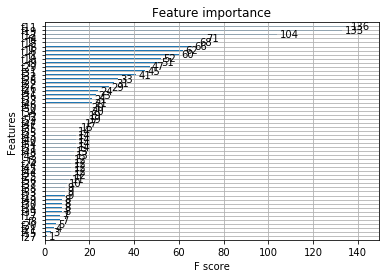

In [81]:
xgb.plot_importance(bst)

In [90]:
preds[0:20]

array([2.0053663, 1.6948777, 2.0053663, 1.4545951, 1.6259466, 2.0053663,
       2.0053663, 2.0053663, 1.6259466, 1.6405877, 1.6259466, 2.0053663,
       1.6259466, 2.0053663, 2.0053663, 1.6405877, 1.6259466, 2.0053663,
       2.0053663, 2.0053663], dtype=float32)

In [88]:
df_mergedfinal['freq'].head(20)

0     9.0
1     9.0
2     9.0
3     9.0
4     8.0
5     8.0
6     8.0
7     8.0
8     8.0
9     8.0
10    8.0
11    8.0
12    8.0
13    8.0
14    8.0
15    8.0
16    8.0
17    7.0
18    7.0
19    7.0
Name: freq, dtype: float64

In [82]:
# make predictions for test data
yhat = model.predict(X_test)
predictions = [round(value) for value in yhat]

In [83]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 83.22%


In [35]:
svr_rbf = SVR(kernel='rbf', C=1, gamma=0.1, epsilon=.1, cache_size=7000)
svr_rbf.fit(X_train, y_train)

LinearSVR(C=1, epsilon=0.1)

In [36]:
yhat=svr_rbf.predict(X_test)
yhat [0:5]

array([1.10006908, 1.10001657, 1.09998891, 1.09991482, 1.09991911])

In [37]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, yhat)

0.36237392750478736

In [38]:
from sklearn.metrics import r2_score
r2_score(y_test, yhat)

-0.04750891188272055

In [39]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, yhat)

0.0007717733003773652

In [40]:
for C in [0.01, 0.1, 1, 10, 100]: 
     for gamma in [0.01, 0.1, 1, 10, 100]: 
          svr_rbf = svm.SVR(kernel='rbf', C=C, gamma=gamma, cache_size=7000)
          svr_rbf.fit(X_train, y_train)
          print(f'C: {C}, gamma: {gamma} --- MSE: {mean_squared_error(y_test, svr_rbf.predict(X_test))}')

C: 0.01, gamma: 0.01 --- MSE: 0.3981538929537291
C: 0.01, gamma: 0.1 --- MSE: 0.3981538496320373
C: 0.01, gamma: 1 --- MSE: 0.39815389184556416
C: 0.01, gamma: 10 --- MSE: 0.39815363233101214
C: 0.01, gamma: 100 --- MSE: 0.39815388883088265
C: 0.1, gamma: 0.01 --- MSE: 0.398154167490886
C: 0.1, gamma: 0.1 --- MSE: 0.39815394332141485
C: 0.1, gamma: 1 --- MSE: 0.39815395718307467
C: 0.1, gamma: 10 --- MSE: 0.3981537423790184
C: 0.1, gamma: 100 --- MSE: 0.39815374302874607
C: 1, gamma: 0.01 --- MSE: 0.39815384849763835
C: 1, gamma: 0.1 --- MSE: 0.3981539252615443
C: 1, gamma: 1 --- MSE: 0.39815373936442217
C: 1, gamma: 10 --- MSE: 0.39815374300023326
C: 1, gamma: 100 --- MSE: 0.3981533496358085
C: 10, gamma: 0.01 --- MSE: 0.3981537463341235
C: 10, gamma: 0.1 --- MSE: 0.398153755971334
C: 10, gamma: 1 --- MSE: 0.3981537425866521
C: 10, gamma: 10 --- MSE: 0.3981539601115541
C: 10, gamma: 100 --- MSE: 0.39815374184587016
C: 100, gamma: 0.01 --- MSE: 0.39815374239871504
C: 100, gamma: 0.1 --

In [46]:
print ('Predictions:', yhat [0:50])
print ('ytest:', y_test [0:50])

Predictions: [2.10036824 3.09997523 3.10020511 3.09963083 3.10006397 2.09967476
 2.10036824 2.10010356 2.10028641 2.90017115 3.09968596 3.09974319
 2.10036824 2.10030241 3.09997523 2.89997823 2.0997647  3.09997523
 3.10016875 2.10012517 3.10015755 3.09975227 3.09975227 2.10010356
 2.72719933 2.89997823 3.09984885 3.09975227 2.10030241 3.09975227
 2.10036824 2.10036824 3.10003995 3.10028585 2.10001176 3.09975227
 2.10010356 2.10036824 3.09997523 2.10001176 2.09984842 2.10030241
 3.09963083 2.08353028 3.09975227 2.10036824 2.09998737 3.09975227
 2.72719933 3.10003995]
ytest: [2 4 3 3 3 2 3 2 3 3 4 3 3 2 3 3 2 3 3 2 3 3 3 2 3 3 3 5 3 3 2 2 3 3 2 3 2
 2 4 2 2 3 3 2 3 2 2 3 3 3]


In [47]:
y_test[0:100]

array([2, 4, 3, 3, 3, 2, 3, 2, 3, 3, 4, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3,
       3, 2, 3, 3, 3, 5, 3, 3, 2, 2, 3, 3, 2, 3, 2, 2, 4, 2, 2, 3, 3, 2,
       3, 2, 2, 3, 3, 3, 2, 2, 2, 2, 3, 3, 2, 3, 4, 3, 4, 2, 3, 3, 3, 3,
       2, 4, 2, 3, 2, 3, 3, 2, 4, 4, 2, 4, 2, 2, 4, 3, 3, 4, 3, 3, 3, 3,
       4, 2, 3, 3, 3, 5, 2, 3, 3, 2, 2, 3])

In [49]:
import seaborn as sns
plt.figure()
sns.pairplot(df_merged20000.head(100))
display.plt.show()

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

Error in callback <function flush_figures at 0x7fe4a8b02170> (for post_execute):


KeyboardInterrupt: 

In [46]:
y_test

array([0, 1, 0, ..., 0, 1, 0])

In [52]:
df_merged20000

,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Other,WEATHER_Overcast,WEATHER_Partly Cloudy,WEATHER_Raining,WEATHER_Severe Crosswind,WEATHER_Sleet/Hail/Freezing Rain,WEATHER_Snowing,...,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31,freq
60797,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.59
60776,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2.59
60792,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.53
60778,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2.41
60834,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29457,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.06
29458,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.06
29459,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0.06
29460,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0.06


In [51]:
df_mergedfinal.head()

,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Other,WEATHER_Overcast,WEATHER_Partly Cloudy,WEATHER_Raining,WEATHER_Severe Crosswind,WEATHER_Sleet/Hail/Freezing Rain,WEATHER_Snowing,...,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31,freq
60797,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
60776,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2
60792,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
60778,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2
60834,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [ ]:
remove month and day as a feature

In [32]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [33]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (56654, 6) (56654,)
Test set: (14164, 6) (14164,)


In [40]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

In [41]:
yhat = clf.predict(X_test)
yhat [0:5]

array([1, 1, 1, 1, 1])

In [42]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.4274216953499625

In [84]:
df_mergedfinal1=df_merged20000.copy()
df_mergedfinal1

,zipcode,month,day,WEATHER_CAT,ROADCOND_CAT,LIGHTCOND_CAT,freq
2532,98101.0,7,9,1,0,5,44.0
2710,98101.0,7,30,1,0,5,44.0
2568,98101.0,7,14,1,0,5,43.0
2692,98101.0,7,28,1,0,5,41.0
2132,98101.0,6,2,1,0,5,40.0
...,...,...,...,...,...,...,...
41471,98118.0,8,16,1,0,6,1.0
41472,98118.0,8,16,4,0,5,1.0
41473,98118.0,8,16,10,0,8,1.0
16796,98105.0,7,4,1,0,8,1.0


In [85]:
df_mergedfinal1.drop(df_mergedfinal1.columns[[2]], axis=1, inplace=True)
df_mergedfinal1

,zipcode,month,WEATHER_CAT,ROADCOND_CAT,LIGHTCOND_CAT,freq
2532,98101.0,7,1,0,5,44.0
2710,98101.0,7,1,0,5,44.0
2568,98101.0,7,1,0,5,43.0
2692,98101.0,7,1,0,5,41.0
2132,98101.0,6,1,0,5,40.0
...,...,...,...,...,...,...
41471,98118.0,8,1,0,6,1.0
41472,98118.0,8,4,0,5,1.0
41473,98118.0,8,10,0,8,1.0
16796,98105.0,7,1,0,8,1.0


In [86]:
df_mergedfinal1 = df_mergedfinal1.groupby(['zipcode','month','WEATHER_CAT','ROADCOND_CAT','LIGHTCOND_CAT'], as_index=False)['freq'].sum()
df_mergedfinal1.sort_values(by='freq', ascending=False, inplace=True)
df_mergedfinal1

,zipcode,month,WEATHER_CAT,ROADCOND_CAT,LIGHTCOND_CAT,freq
387,98101.0,7,1,0,5,930.0
343,98101.0,6,1,0,5,841.0
425,98101.0,8,1,0,5,812.0
296,98101.0,5,1,0,5,758.0
242,98101.0,4,1,0,5,738.0
...,...,...,...,...,...,...
8590,98122.0,8,4,8,1,1.0
8589,98122.0,8,4,7,5,1.0
8588,98122.0,8,4,0,6,1.0
4021,98108.0,2,4,6,5,1.0


In [87]:
df_features1=df_mergedfinal1.drop(df_mergedfinal1.columns[[5]], axis=1)
df_features1

,zipcode,month,WEATHER_CAT,ROADCOND_CAT,LIGHTCOND_CAT
387,98101.0,7,1,0,5
343,98101.0,6,1,0,5
425,98101.0,8,1,0,5
296,98101.0,5,1,0,5
242,98101.0,4,1,0,5
...,...,...,...,...,...
8590,98122.0,8,4,8,1
8589,98122.0,8,4,7,5
8588,98122.0,8,4,0,6
4021,98108.0,2,4,6,5


In [88]:
X1 = np.asarray(df_features1)
X1[0:5]
df_mergedfinal1['freq'] = df_mergedfinal1['freq'].astype('int')
y1 = np.asarray(df_mergedfinal1['freq'])
y1 [0:5]

array([930, 841, 812, 758, 738])

In [89]:
X1_train, X1_test, y1_train, y1_test = train_test_split( X1, y1, test_size=0.2, random_state=4)
print ('Train set:', X1_train.shape,  y1_train.shape)
print ('Test set:', X1_test.shape,  y1_test.shape)

Train set: (10163, 5) (10163,)
Test set: (2541, 5) (2541,)


In [90]:
from sklearn import svm
clf1 = svm.SVC(kernel='rbf')
clf1.fit(X1_train, y1_train)

SVC()

In [92]:
yhat1 = clf1.predict(X1_test)
yhat1 [0:5]

array([1, 1, 1, 1, 1])